In [6]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid') 
import tensorflow as tf
np.set_printoptions(precision=3, suppress=True)  # improve float readability
from sklearn import datasets

In [31]:
path = r"C:\Users\vulo\OneDrive\Documents\GitHub\W207-Spring-2023\Breakout Data" 

train_data = pd.read_csv(path + '/' + 'HARtrain.csv')
X_train = train_data.iloc[:,:562].values
y_train = train_data.iloc[:,562:].values
test_data = pd.read_csv(path + '/' + 'HARtest.csv')
X_test = test_data.iloc[:,:562].values
y_test = test_data.iloc[:,562:].values

print('Train dataset shape is: ' + str(train_data.shape))
print('Train dataset shape is: ' + str(test_data.shape))


Train dataset shape is: (7352, 563)
Train dataset shape is: (2947, 563)


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

C:\Users\vulo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vulo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [34]:
y_pred = classifier.predict(X_test)

In [39]:
probs_y = classifier.predict_proba(X_test)
probs_y

array([[0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.03 , 0.97 , 0.   , 0.   , 0.   ],
       [0.   , 0.064, 0.936, 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.999],
       [0.   , 0.   , 0.   , 0.015, 0.002, 0.983]])

In [38]:
np.unique(y_pred)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [44]:
probs_y = np.round(probs_y, 2)
probs_y

array([[0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.03, 0.97, 0.  , 0.  , 0.  ],
       [0.  , 0.06, 0.94, 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.98]])

In [46]:
probs_y[:,1]

array([0.  , 0.03, 0.06, ..., 0.  , 0.  , 0.  ])

In [49]:
res = "{:<10} | {:<10} | {:<25} | {:<25} | {:<25} | {:<25} | {:<25} |{:<25}".format("y_test", "y_pred", "Laying(%)", "Sitting(%)", "Standing(%)","Walking","Walking_downstairs","Walking_upstairs\n")
res += "-"*100+"\n"
res += "\n".join("{:<10} | {:<10} | {:<25} | {:<25} | {:<25} | {:<25} | {:<25} |{:<25}".format(x, y, a, b, c,d,e,f) for x, y, a, b, c,d,e,f in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2], probs_y[:,3], probs_y[:,4], probs_y[:,5]))
res += "\n"+"-"*100+"\n"
print(res)

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[533,   0,   4,   0,   0,   0],
       [  2, 444,  43,   0,   0,   2],
       [  0,  24, 508,   0,   0,   0],
       [  0,   0,   0, 482,   9,   5],
       [  0,   0,   1,   0, 408,  11],
       [  0,   0,   0,  14,   2, 455]], dtype=int64)

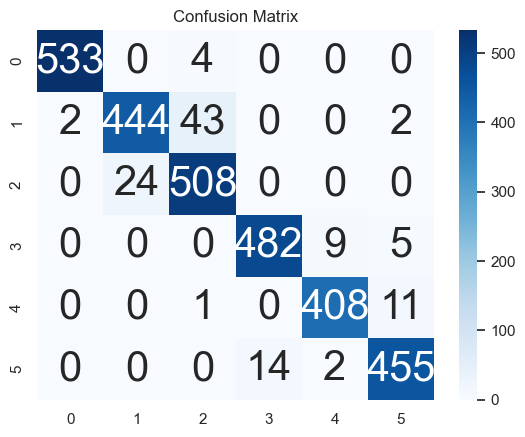

In [52]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax)
ax.set_title('Confusion Matrix')
plt.show()

In [53]:
### Second option
path = r"C:\Users\vulo\OneDrive\Documents\GitHub\W207-Spring-2023\Breakout Data" 

train_data = pd.read_csv(path + '/' + 'HARtrain.csv')
X_train = train_data.iloc[:,:562].values
y_train = train_data.iloc[:,562:].values
test_data = pd.read_csv(path + '/' + 'HARtest.csv')
X_test = test_data.iloc[:,:562].values
y_test = test_data.iloc[:,562:].values

print('Train dataset shape is: ' + str(train_data.shape))
print('Train dataset shape is: ' + str(test_data.shape))


Train dataset shape is: (7352, 563)
Train dataset shape is: (2947, 563)


In [ ]:
X_train_means = np.mean(X_train, axis = 0)
X_train_stds = np.mean(X_train, axis = 0)
X_train = (X_train - X_train_means)/X_train_stds
X_test = (X_test - X_train_means)